In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amssymb}",
                                     r"\usepackage{amsmath}"]

In [2]:
test_info = pd.read_csv("./test_info.csv")
test_info

,test,workersCount,locationsCount,sampleSize,defaultMean,hbTimeout,stdDevCount,geoFactor,crashProb,delta,...,learningRate,regParam,numIterations,messageLossProb,stdevMargin,stdevFactor,pattern,distribution,averageDetectiontime,mistakeRate
0,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.0E-10,0.3,10,0.01,3.0,100.0,True,3,9470.689655,0.380556
1,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.0E-10,0.3,10,0.01,3.0,100.0,False,3,9295.873016,0.381111
2,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.0E-10,0.3,10,0.01,3.0,100.0,True,1,27268.758065,0.260556
3,mlfd_test,100,20,200,3000.0,2 seconds,30,1000.0,0.001,nil,...,1.0E-10,0.3,10,0.01,3.0,100.0,True,2,5553.484375,1.389444
4,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.01,nil,100.0,True,3,20930.862069,0.051111
5,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.01,nil,100.0,False,3,20969.777778,0.052778
6,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.01,nil,100.0,True,1,64341.704918,0.063333
7,epfd_test,100,20,nil,nil,2 seconds,30,1000.0,0.001,2 seconds,...,nil,nil,nil,0.01,nil,100.0,True,2,17359.093750,0.050000


## Compare Failure detectors with different RTT patterns

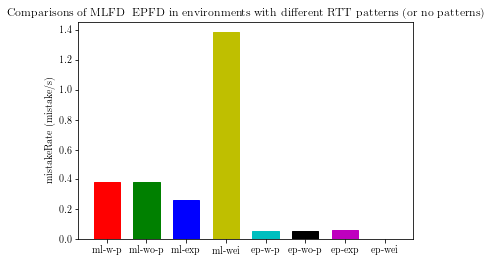

In [3]:
mlfdPattern = test_info.iloc[0]["mistakeRate"]
mlfdNoPattern = test_info.iloc[1]["mistakeRate"]
mlfdExp = test_info.iloc[2]["mistakeRate"]
mlfdWei = test_info.iloc[3]["mistakeRate"]
epfdPattern = test_info.iloc[4]["mistakeRate"]
epfdNoPattern = test_info.iloc[5]["mistakeRate"]
epfdExp = test_info.iloc[6]["mistakeRate"]
epfdWei = test_info.iloc[7]["mistakeRate"]
data = [mlfdPattern, mlfdNoPattern, mlfdExp, mlfdWei, epfdPattern, epfdNoPattern, epfdExp, epfdWei]
labels = ('ml-w-p', 'ml-wo-p', "ml-exp","ml-wei","ep-w-p","ep-wo-p","ep-exp","ep-wei")
N = len(labels)
x = range(N)
width = 1/1.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('y')
barlist[4].set_color('c')
barlist[5].set_color('k')
barlist[6].set_color('m')
barlist[7].set_color('w')
plt.xticks(np.arange(N), labels)
plt.ylabel('mistakeRate (mistake/s)')
plt.title('Comparisons of MLFD & EPFD in environments with different RTT patterns (or no patterns)')

(0, 10)

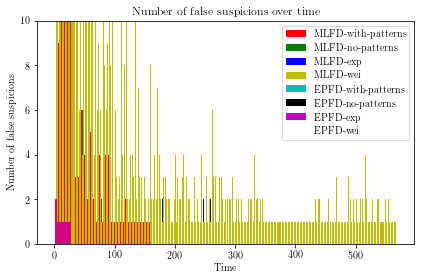

In [4]:
fs_mlfd_pattern = pd.read_csv('test4_pattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_no_pattern = pd.read_csv('test4_nopattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_exp = pd.read_csv('test4_exp_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_wei = pd.read_csv('test4_weibull_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_epfd_pattern = pd.read_csv('test4_pattern_epfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_epfd_no_pattern = pd.read_csv('test4_nopattern_epfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_epfd_exp = pd.read_csv('test4_exp_epfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_epfd_wei = pd.read_csv('test4_weibull_epfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 0.45
error_config = {'ecolor': '0.3'}
index1 = np.arange(len(fs_mlfd_pattern.values))
index2 = np.arange(len(fs_mlfd_no_pattern.values))
index3 = np.arange(len(fs_mlfd_exp))
index4 = np.arange(len(fs_mlfd_wei))
index5 = np.arange(len(fs_epfd_pattern.values))
index6 = np.arange(len(fs_epfd_no_pattern.values))
index7 = np.arange(len(fs_epfd_exp))
index8 = np.arange(len(fs_epfd_wei))
plt.bar(index1, fs_mlfd_pattern.values, width=width, color='r', error_kw=error_config, label='MLFD-with-patterns')
plt.bar(index2 + bar_width, fs_mlfd_no_pattern.values, width=width, color='g', error_kw=error_config, label='MLFD-no-patterns')
plt.bar(index3 + bar_width, fs_mlfd_exp.values, width=width, color='b', error_kw=error_config, label='MLFD-exp')
plt.bar(index4 + bar_width, fs_mlfd_wei.values, width=width, color='y', error_kw=error_config, label='MLFD-wei')
plt.bar(index5 + bar_width, fs_epfd_pattern.values, width=width, color='c', error_kw=error_config, label='EPFD-with-patterns')
plt.bar(index6 + bar_width, fs_epfd_no_pattern.values, width=width, color='k', error_kw=error_config, label='EPFD-no-patterns')
plt.bar(index7 + bar_width, fs_epfd_exp.values, width=width, color='m', error_kw=error_config, label='EPFD-exp')
plt.bar(index8 + bar_width, fs_epfd_wei.values, width=width, color='w', error_kw=error_config, label='EPFD-wei')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,10])

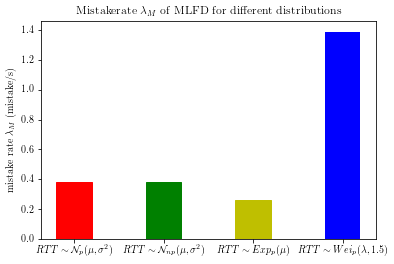

In [5]:
mlfdPattern = test_info.iloc[0]["mistakeRate"]
mlfdNoPattern = test_info.iloc[1]["mistakeRate"]
mlfdExp = test_info.iloc[2]["mistakeRate"]
mlfdWei = test_info.iloc[3]["mistakeRate"]
data = [mlfdPattern, mlfdNoPattern, mlfdExp, mlfdWei]
labels = (r'$RTT \sim \mathcal{N}_p(\mu, \sigma^2)$', r'$RTT \sim \mathcal{N}_{np}(\mu, \sigma^2)$', r"$RTT \sim Exp_p(\mu)$", "$RTT \sim Wei_p(\lambda, 1.5)$")
N = len(labels)
x = range(N)
width = 1/2.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('y')
plt.xticks(np.arange(N), labels)
plt.ylabel(r'mistake rate $\lambda_M$ (mistake/s)')
plt.title(r'Mistakerate $\lambda_M$ of MLFD for different distributions')
plt.savefig('mlfd_mistake_rate_comparison.eps', format='eps', dpi=1000)

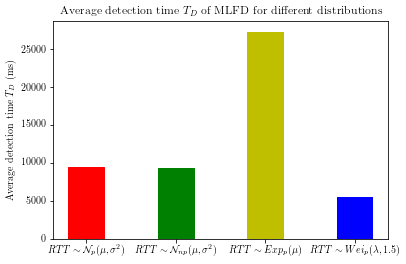

In [6]:
mlfdPattern = test_info.iloc[0]["averageDetectiontime"]
mlfdNoPattern = test_info.iloc[1]["averageDetectiontime"]
mlfdExp = test_info.iloc[2]["averageDetectiontime"]
mlfdWei = test_info.iloc[3]["averageDetectiontime"]
data = [mlfdPattern, mlfdNoPattern, mlfdExp, mlfdWei]
labels = (r'$RTT \sim \mathcal{N}_p(\mu, \sigma^2)$', r'$RTT \sim \mathcal{N}_{np}(\mu, \sigma^2)$', r"$RTT \sim Exp_p(\mu)$", "$RTT \sim Wei_p(\lambda, 1.5)$")
N = len(labels)
x = range(N)
width = 1/2.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('y')
plt.xticks(np.arange(N), labels)
plt.ylabel(r'Average detection time $T_D$ (ms)')
plt.title(r'Average detection time $T_D$ of MLFD for different distributions')
plt.savefig('mlfd_detection_time_comparison.eps', format='eps', dpi=1000)

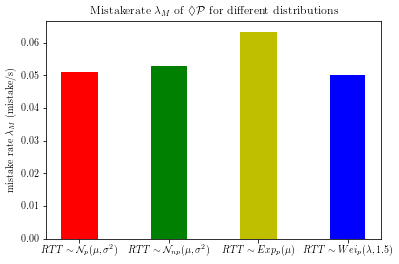

In [7]:
epfdPattern = test_info.iloc[4]["mistakeRate"]
epfdNoPattern = test_info.iloc[5]["mistakeRate"]
epfdExp = test_info.iloc[6]["mistakeRate"]
epfdWei = test_info.iloc[7]["mistakeRate"]
data = [epfdPattern, epfdNoPattern, epfdExp, epfdWei]
#labels = ('EPFD-With-Pattern', 'EPFD-No-Pattern', "EPFD-Exp", "EPFD-Wei")
labels = (r'$RTT \sim \mathcal{N}_p(\mu, \sigma^2)$', r'$RTT \sim \mathcal{N}_{np}(\mu, \sigma^2)$', r"$RTT \sim Exp_p(\mu)$", "$RTT \sim Wei_p(\lambda, 1.5)$")
N = len(labels)
x = range(N)
width = 1/2.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('y')
plt.xticks(np.arange(N), labels)
plt.ylabel(r'mistake rate $\lambda_M$ (mistake/s)')
plt.title(r'Mistakerate $\lambda_M$ of $\Diamond \mathcal{P}$ for different distributions')
plt.savefig('epfd_mistake_rate_comparison.eps', format='eps', dpi=1000)

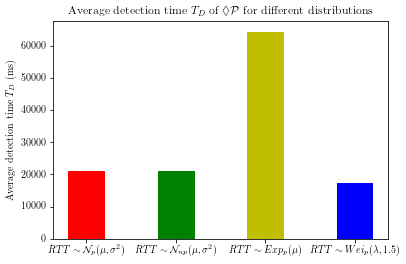

In [8]:
epfdPattern = test_info.iloc[4]["averageDetectiontime"]
epfdNoPattern = test_info.iloc[5]["averageDetectiontime"]
epfdExp = test_info.iloc[6]["averageDetectiontime"]
epfdWei = test_info.iloc[7]["averageDetectiontime"]
data = [epfdPattern, epfdNoPattern, epfdExp, epfdWei]
#labels = ('EPFD-With-Pattern', 'EPFD-No-Pattern', "EPFD-Exp", "EPFD-Wei")
labels = (r'$RTT \sim \mathcal{N}_p(\mu, \sigma^2)$', r'$RTT \sim \mathcal{N}_{np}(\mu, \sigma^2)$', r"$RTT \sim Exp_p(\mu)$", r"$RTT \sim Wei_p(\lambda, 1.5)$")
N = len(labels)
x = range(N)
width = 1/2.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('y')
plt.xticks(np.arange(N), labels)
plt.ylabel(r'Average detection time $T_D$ (ms)')
plt.title(r'Average detection time $T_D$ of $\Diamond \mathcal{P}$ for different distributions')
plt.savefig('epfd_detection_time_comparison.eps', format='eps', dpi=1000)

(0, 10)

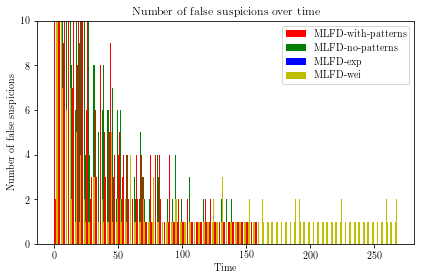

In [9]:
fs_mlfd_pattern = pd.read_csv('test4_pattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_no_pattern = pd.read_csv('test4_nopattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_exp = pd.read_csv('test4_exp_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
fs_mlfd_weibull = pd.read_csv('test4_exp_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 0.45
index1 = np.arange(len(fs_mlfd_pattern.values))
index2 = np.arange(len(fs_mlfd_no_pattern.values))
index3 = np.arange(len(fs_mlfd_exp))
index4 = np.arange(len(fs_mlfd_weibull))
plt.bar(index1, fs_mlfd_pattern.values, width=width, color='r', error_kw=error_config, label='MLFD-with-patterns')
plt.bar(index2 + bar_width, fs_mlfd_no_pattern.values, width=width, color='g', error_kw=error_config, label='MLFD-no-patterns')
plt.bar(index3 + bar_width, fs_mlfd_exp.values, width=width, color='b', error_kw=error_config, label='MLFD-exp')
plt.bar(index4 + bar_width, fs_mlfd_weibull.values, width=width, color='y', error_kw=error_config, label='MLFD-wei')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,10])

17359.09375
64341.704918


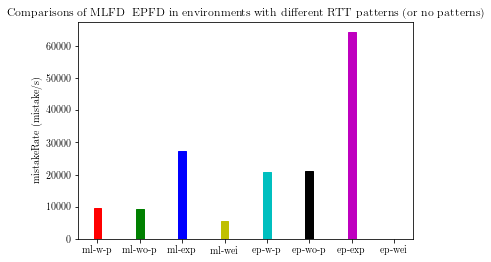

In [10]:
mlfdPattern = test_info.iloc[0]["averageDetectiontime"]
mlfdNoPattern = test_info.iloc[1]["averageDetectiontime"]
mlfdExp = test_info.iloc[2]["averageDetectiontime"]
mlfdWei = test_info.iloc[3]["averageDetectiontime"]
epfdPattern = test_info.iloc[4]["averageDetectiontime"]
epfdNoPattern = test_info.iloc[5]["averageDetectiontime"]
epfdExp = test_info.iloc[6]["averageDetectiontime"]
epfdWei = test_info.iloc[7]["averageDetectiontime"]
data = [mlfdPattern, mlfdNoPattern, mlfdExp, mlfdWei, epfdPattern, epfdNoPattern, epfdExp, epfdWei]
labels = ('ml-w-p','ml-wo-p',"ml-exp","ml-wei","ep-w-p","ep-wo-p","ep-exp","ep-wei")
N = len(labels)
x = range(N)
width = 1/5.5
barlist = plt.bar(x, data, width, color="blue")
barlist[0].set_color('r')
barlist[1].set_color('g')
barlist[2].set_color('b')
barlist[3].set_color('y')
barlist[4].set_color('c')
barlist[5].set_color('k')
barlist[6].set_color('m')
barlist[7].set_color('w')
plt.xticks(np.arange(N), labels)
plt.ylabel('mistakeRate (mistake/s)')
plt.title('Comparisons of MLFD & EPFD in environments with different RTT patterns (or no patterns)')
print(test_info.iloc[7]["averageDetectiontime"])
print(test_info.iloc[6]["averageDetectiontime"])

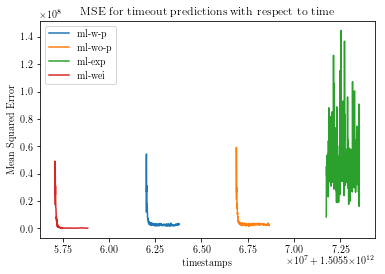

In [11]:
pattern_mlfd_eval = pd.read_csv("test4_pattern_mlfd/data/stats/testresults.csv")
nopattern_mlfd_eval = pd.read_csv("test4_nopattern_mlfd/data/stats/testresults.csv")
exp_mlfd_eval = pd.read_csv("test4_exp_mlfd/data/stats/testresults.csv")
weibull_mlfd_eval = pd.read_csv("test4_weibull_mlfd/data/stats/testresults.csv")
time_pattern_mlfd = pattern_mlfd_eval["timestamp"].values
mse_pattern_mlfd = pattern_mlfd_eval["meanSquaredError"].values
time_nopattern_mlfd = nopattern_mlfd_eval["timestamp"].values
mse_nopattern_mlfd = nopattern_mlfd_eval["meanSquaredError"].values
time_exp_mlfd = exp_mlfd_eval["timestamp"].values
mse_exp_mlfd = exp_mlfd_eval["meanSquaredError"].values
time_weibull_mlfd = weibull_mlfd_eval["timestamp"].values
mse_weibull_mlfd = weibull_mlfd_eval["meanSquaredError"].values
plt.plot(time_pattern_mlfd, mse_pattern_mlfd, label="ml-w-p")
plt.plot(time_nopattern_mlfd, mse_nopattern_mlfd, label="ml-wo-p")
plt.plot(time_exp_mlfd, mse_exp_mlfd, label="ml-exp")
plt.plot(time_weibull_mlfd, mse_weibull_mlfd, label="ml-wei")
plt.ylabel('Mean Squared Error')
plt.xlabel('timestamps')
plt.title('MSE for timeout predictions with respect to time')
plt.legend()
plt.show()

In [12]:
#mse_exp_mlfd

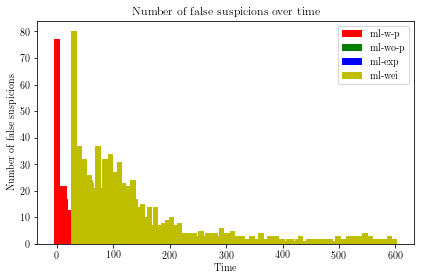

In [13]:
mlfd_pattern_fs = pd.read_csv('test4_pattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
mlfd_nopattern_fs = pd.read_csv('test4_nopattern_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
mlfd_exp_fs = pd.read_csv('test4_exp_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
mlfd_weibull_fs = pd.read_csv('test4_weibull_mlfd/data/stats/node_false_suspicions.csv').groupby("timestamp").count()
bar_width = 10
error_config = {'ecolor': '0.3'}
index1 = np.arange(len(mlfd_pattern_fs.values))
index2 = np.arange(len(mlfd_nopattern_fs.values))
index3 = np.arange(len(mlfd_exp_fs.values))
index4 = np.arange(len(mlfd_weibull_fs.values))
plt.bar(index1, mlfd_pattern_fs.values, width=bar_width, color='r', error_kw=error_config, label='ml-w-p')
plt.bar(index2 + bar_width*3, mlfd_nopattern_fs.values, width=bar_width, color='g', error_kw=error_config, label='ml-wo-p')
plt.bar(index3 + bar_width*3, mlfd_exp_fs.values, width=bar_width, color='b', error_kw=error_config, label='ml-exp')
plt.bar(index4 + bar_width*3, mlfd_weibull_fs.values, width=bar_width, color='y', error_kw=error_config, label='ml-wei')
plt.xlabel('Time')
plt.ylabel('Number of false suspicions')
plt.title('Number of false suspicions over time')
plt.legend()
#lt.xticks(index1 + bar_width, ('MLFD', 'EPFD'))
plt.tight_layout()
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([0,10])

In [14]:
def normalizeTime(row):
    tm = row["timestamp"]
    #print("tm:" + str(tm)
    row["timestamp"] = row["timestamp"] - minTime
    return row

In [16]:
pattern_mlfd_eval = pd.read_csv("test4_pattern_mlfd/data/stats/testresults.csv")
sorted_eval = pattern_mlfd_eval.sort_values("timestamp")
sorted_eval.head()

,meanSquaredError,rootMeanSquaredError,rSquared,meanAbsoluteError,explainedVariance,timestamp
0,1.216878e+07,3488.377556,-15663.431864,2554.461945,1.229768e+07,1505562014000
1,5.023363e+07,7087.568790,-188.920910,5288.286646,5.531901e+07,1505562021000
2,5.446209e+07,7379.843702,-28.121999,5280.677889,7.032427e+07,1505562028000
3,2.673798e+07,5170.878353,-19.661981,3990.969047,3.527242e+07,1505562035000
4,3.141861e+07,5605.230515,-8.393892,4098.032006,4.817663e+07,1505562043000


In [17]:
minTime = sorted_eval["timestamp"].values[0]
df = sorted_eval.apply(normalizeTime, axis=1)
time_pattern_mlfd = df["timestamp"].values
mse_pattern_mlfd = df["meanSquaredError"].values

In [18]:
nopattern_mlfd_eval = pd.read_csv("test4_nopattern_mlfd/data/stats/testresults.csv")
sorted_eval = nopattern_mlfd_eval.sort_values("timestamp")
minTime = sorted_eval["timestamp"].values[0]
df = sorted_eval.apply(normalizeTime, axis=1)
time_nopattern_mlfd = df["timestamp"].values
mse_nopattern_mlfd = df["meanSquaredError"].values
#time_nopattern_mlfd = time_nopattern_mlfd.drop(len(time_nopattern_mlfd)-1)
#time_nopattern_mlfd = time_nopattern_mlfd.drop(len(time_nopattern_mlfd)-1)
#time_nopattern_mlfd = time_nopattern_mlfd.drop(len(time_nopattern_mlfd)-1).values

In [19]:
exp_mlfd_eval = pd.read_csv("test4_exp_mlfd/data/stats/testresults.csv")
sorted_eval = exp_mlfd_eval.sort_values("timestamp")
minTime = sorted_eval["timestamp"].values[0]
df = sorted_eval.apply(normalizeTime, axis=1)
time_exp_mlfd = df["timestamp"].values
mse_exp_mlfd = df["meanSquaredError"].values

In [20]:
weibull_mlfd_eval = pd.read_csv("test4_weibull_mlfd/data/stats/testresults.csv")
sorted_eval = weibull_mlfd_eval.sort_values("timestamp")
minTime = sorted_eval["timestamp"].values[0]
def normalizeTime(row):
    tm = row["timestamp"]
    #print("tm:" + str(tm)
    row["timestamp"] = row["timestamp"] - minTime
    return row

df = sorted_eval.apply(normalizeTime, axis=1)
time_weibull_mlfd = df["timestamp"].values
mse_weibull_mlfd = df["meanSquaredError"].values

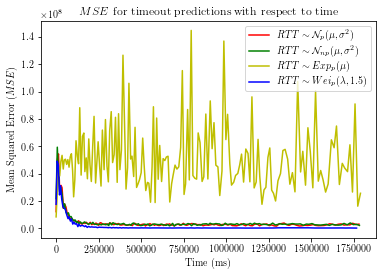

In [21]:
plt.plot(time_pattern_mlfd, mse_pattern_mlfd, label=r'$RTT \sim \mathcal{N}_p(\mu, \sigma^2)$', color="r")
plt.plot(time_nopattern_mlfd, mse_nopattern_mlfd, label=r'$RTT \sim \mathcal{N}_{np}(\mu, \sigma^2)$', color="g")
plt.plot(time_exp_mlfd, mse_exp_mlfd, label=r"$RTT \sim Exp_p(\mu)$", color="y")
plt.plot(time_weibull_mlfd, mse_weibull_mlfd, label=r"$RTT \sim Wei_p(\lambda, 1.5)$", color="b")
plt.ylabel(r'Mean Squared Error ($MSE$)')
plt.xlabel('Time (ms)')
plt.title(r'$MSE$ for timeout predictions with respect to time')
plt.legend()
plt.savefig('mse_comparison.eps', format='eps', dpi=1000)
plt.show()

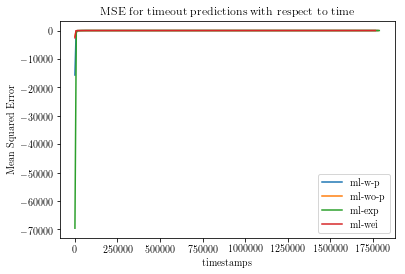

In [22]:
weibull_mlfd_eval.head
pattern_mlfd_eval.head
rsq_pattern_mlfd = pattern_mlfd_eval["rSquared"].values
rsq_nopattern_mlfd = nopattern_mlfd_eval["rSquared"].values
rsq_weibull_mlfd = weibull_mlfd_eval["rSquared"].values
rsq_exp_mlfd = exp_mlfd_eval["rSquared"].values
plt.plot(time_pattern_mlfd, rsq_pattern_mlfd, label="ml-w-p")
plt.plot(time_nopattern_mlfd, rsq_nopattern_mlfd, label="ml-wo-p")
plt.plot(time_exp_mlfd, rsq_exp_mlfd, label="ml-exp")
plt.plot(time_weibull_mlfd, rsq_weibull_mlfd, label="ml-wei")
plt.ylabel('Mean Squared Error')
plt.xlabel('timestamps')
plt.title('MSE for timeout predictions with respect to time')
plt.legend()
plt.show()